The Data


In [90]:
import pandas as pd
import numpy as np

In [2]:
teams = pd.read_csv("teams.csv")

In [3]:
teams

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


In [5]:
teams


,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


In [15]:
teams

,team,country,year,athletes,prev_medals,medals
0,AFG,Afghanistan,1964,8,0.0,0
1,AFG,Afghanistan,1968,5,0.0,0
2,AFG,Afghanistan,1972,8,0.0,0
3,AFG,Afghanistan,1980,11,0.0,0
4,AFG,Afghanistan,2004,5,0.0,0
...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,0.0,0
2140,ZIM,Zimbabwe,2004,14,0.0,3
2141,ZIM,Zimbabwe,2008,16,3.0,4
2142,ZIM,Zimbabwe,2012,9,4.0,0


In [22]:
numerical_columns = teams.select_dtypes(include=[np.number])
cleaned_teams = teams[numerical_columns.columns]

In [24]:
cleaned_teams.corr()["medals"]

year          -0.021603
athletes       0.840817
prev_medals    0.920048
medals         1.000000
Name: medals, dtype: float64

In [25]:
import seaborn as sns

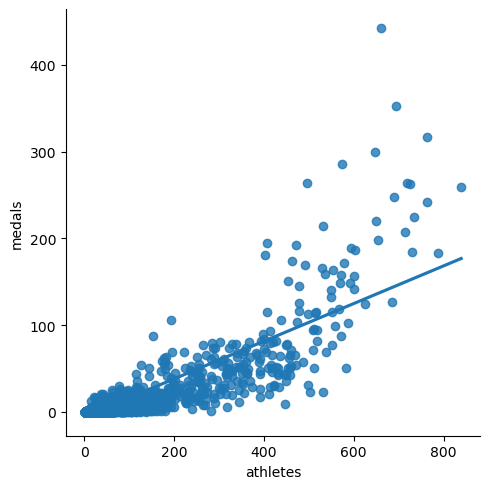

In [26]:
sns.lmplot(x="athletes", y="medals", data=teams, fit_reg=True, ci=None)

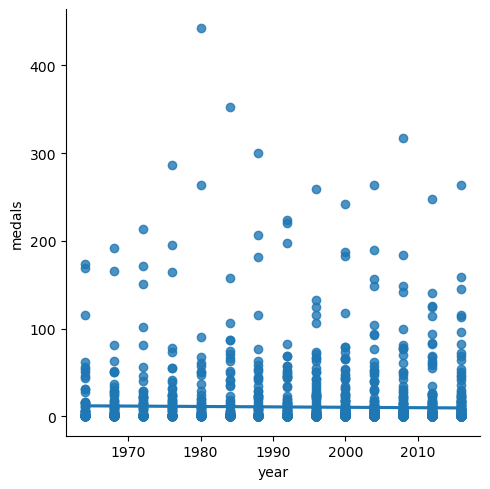

In [30]:
sns.lmplot(x="year", y="medals", data=teams, fit_reg=True, ci=None)

<Axes: ylabel='Frequency'>

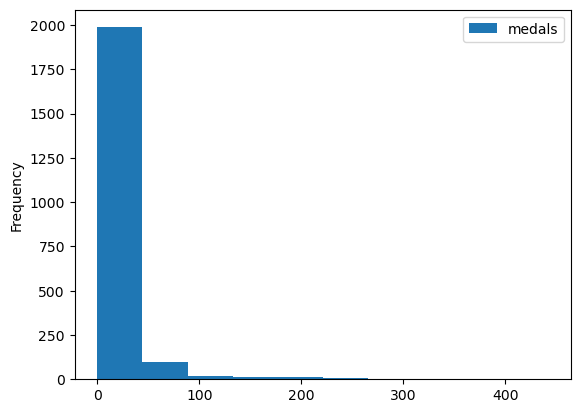

In [31]:
teams.plot.hist(y="medals")

In [32]:
teams[teams.isnull().any(axis=1)]

,team,country,year,athletes,prev_medals,medals
19,ALB,Albania,1992,9,NaN,0
26,ALG,Algeria,1964,7,NaN,0
39,AND,Andorra,1976,3,NaN,0
50,ANG,Angola,1980,17,NaN,0
59,ANT,Antigua and Barbuda,1976,17,NaN,0
...,...,...,...,...,...,...
2092,VIN,Saint Vincent and the Grenadines,1988,6,NaN,0
2103,YAR,North Yemen,1984,3,NaN,0
2105,YEM,Yemen,1992,8,NaN,0
2112,YMD,South Yemen,1988,5,NaN,0


In [33]:
teams= teams.dropna()

In [34]:
teams

,team,country,year,athletes,prev_medals,medals
0,AFG,Afghanistan,1964,8,0.0,0
1,AFG,Afghanistan,1968,5,0.0,0
2,AFG,Afghanistan,1972,8,0.0,0
3,AFG,Afghanistan,1980,11,0.0,0
4,AFG,Afghanistan,2004,5,0.0,0
...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,0.0,0
2140,ZIM,Zimbabwe,2004,14,0.0,3
2141,ZIM,Zimbabwe,2008,16,3.0,4
2142,ZIM,Zimbabwe,2012,9,4.0,0


In [41]:
train = teams[teams["year"]<2012].copy()
test = teams[teams["year"]>=2012].copy()


In [43]:
train.shape

(1609, 6)

In [42]:
test.shape

(405, 6)

Accuracy Metric

In [44]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [53]:
predictors = ["athletes", "prev_medals"]
target= "medals"

In [54]:
reg.fit(train[predictors], train["medals"])

LinearRegression()

In [55]:
predictions = reg.predict(test[predictors])

In [57]:
predictions.shape

(405,)

In [58]:
test["predictions"] = predictions

In [59]:
test

,team,country,year,athletes,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,1.0,1,-0.961221
7,AFG,Afghanistan,2016,3,1.0,0,-1.176333
24,ALB,Albania,2012,10,0.0,0,-1.425032
25,ALB,Albania,2016,6,0.0,0,-1.711847
37,ALG,Algeria,2012,39,2.0,1,2.155629
...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,0.0,0,-1.926958
2131,ZAM,Zambia,2012,7,0.0,0,-1.640143
2132,ZAM,Zambia,2016,7,0.0,0,-1.640143
2142,ZIM,Zimbabwe,2012,9,4.0,0,1.505767


In [60]:
test.loc[test["predictions"] < 0, "predictions"] = 0

In [61]:
test["predictions"] = test["predictions"].round()

In [62]:
test

,team,country,year,athletes,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,1.0,1,0.0
7,AFG,Afghanistan,2016,3,1.0,0,0.0
24,ALB,Albania,2012,10,0.0,0,0.0
25,ALB,Albania,2016,6,0.0,0,0.0
37,ALG,Algeria,2012,39,2.0,1,2.0
...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,0.0,0,0.0
2131,ZAM,Zambia,2012,7,0.0,0,0.0
2132,ZAM,Zambia,2016,7,0.0,0,0.0
2142,ZIM,Zimbabwe,2012,9,4.0,0,2.0


In [63]:
from sklearn.metrics import mean_absolute_error
error = mean_absolute_error(test["medals"], test["predictions"])

In [64]:
error

3.2987654320987656

In [65]:
teams.describe()["medals"]

count    2014.000000
mean       10.990070
std        33.627528
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       442.000000
Name: medals, dtype: float64

In [66]:
test[test["team"] == "USA"]

,team,country,year,athletes,prev_medals,medals,predictions
2053,USA,United States,2012,689,317.0,248,285.0
2054,USA,United States,2016,719,248.0,264,236.0


In [67]:
test[test["team"] == "IND"]

,team,country,year,athletes,prev_medals,medals,predictions
907,IND,India,2012,95,3.0,6,7.0
908,IND,India,2016,130,6.0,2,12.0


In [70]:
errors = (test["medals"] - test["predictions"]).abs()

In [71]:
errors

6       1.0
7       0.0
24      0.0
25      0.0
37      1.0
       ... 
2111    0.0
2131    0.0
2132    0.0
2142    2.0
2143    0.0
Length: 405, dtype: float64

In [72]:
error_by_team = errors.groupby(test["team"]).mean()

In [73]:
error_by_team

team
AFG    0.5
ALB    0.0
ALG    1.5
AND    0.0
ANG    0.0
      ... 
VIE    1.0
VIN    0.0
YEM    0.0
ZAM    0.0
ZIM    1.0
Length: 204, dtype: float64

In [74]:
medals_by_teams = test["medals"].groupby(test["team"]).mean()

In [78]:
error_ratio = error_by_team /medals_by_teams

In [79]:
error_ratio

team
AFG    1.0
ALB    NaN
ALG    1.0
AND    NaN
ANG    NaN
      ... 
VIE    1.0
VIN    NaN
YEM    NaN
ZAM    NaN
ZIM    inf
Length: 204, dtype: float64

In [80]:
error_ratio[~pd.isnull(error_ratio)]

team
AFG    1.000000
ALG    1.000000
ARG    0.853659
ARM    0.428571
AUS    0.367347
         ...   
USA    0.126953
UZB    0.625000
VEN    1.750000
VIE    1.000000
ZIM         inf
Length: 102, dtype: float64

In [86]:
import numpy as np
error_ratio = error_ratio[np.isfinite(error_ratio)]

In [87]:
error_ratio

team
AFG    1.000000
ALG    1.000000
ARG    0.853659
ARM    0.428571
AUS    0.367347
         ...   
UKR    0.951220
USA    0.126953
UZB    0.625000
VEN    1.750000
VIE    1.000000
Length: 97, dtype: float64

<Axes: ylabel='Frequency'>

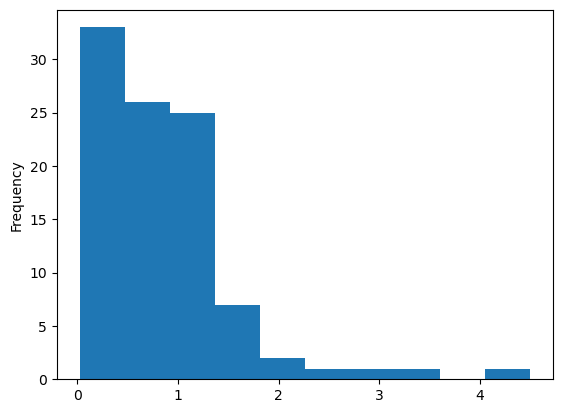

In [89]:
error_ratio.plot.hist()